In [1]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
# Unzip the dataset file and store it in a folder called images.
# !unzip "/content/drive/MyDrive/RM_Segmentation_Assignment_dataset.zip" -d "/content/drive/MyDrive/images_segm/"

In [3]:
!pip install pycocotools

In [4]:
from pycocotools.coco import COCO
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import os
import random
import skimage.io as io
import numpy as np


In [5]:
# Path to annotation file
train_ann_path = '/content/drive/MyDrive/images_segm/train-300/labels.json'
train_img_dir = '/content/drive/MyDrive/images_segm/train-300/data/'


In [6]:
# Initialising COCO API for instance annotations.
coco = COCO(train_ann_path)

loading annotations into memory...
Done (t=0.06s)
creating index...
index created!


In [7]:
# Extract and display COCO categories and supercategories for the training dataset.

category_IDs = coco.getCatIds()
categories = coco.loadCats(category_IDs)

print(categories)

[{'id': 0, 'name': 'airplane', 'supercategory': 'vehicle'}, {'id': 1, 'name': 'backpack', 'supercategory': 'accessory'}, {'id': 2, 'name': 'banana', 'supercategory': 'food'}, {'id': 3, 'name': 'baseball bat', 'supercategory': 'sports'}, {'id': 4, 'name': 'baseball glove', 'supercategory': 'sports'}, {'id': 5, 'name': 'bear', 'supercategory': 'animal'}, {'id': 6, 'name': 'bench', 'supercategory': 'outdoor'}, {'id': 7, 'name': 'bicycle', 'supercategory': 'vehicle'}, {'id': 8, 'name': 'bird', 'supercategory': 'animal'}, {'id': 9, 'name': 'boat', 'supercategory': 'vehicle'}, {'id': 10, 'name': 'book', 'supercategory': 'indoor'}, {'id': 11, 'name': 'bottle', 'supercategory': 'kitchen'}, {'id': 12, 'name': 'bowl', 'supercategory': 'kitchen'}, {'id': 13, 'name': 'broccoli', 'supercategory': 'food'}, {'id': 14, 'name': 'bus', 'supercategory': 'vehicle'}, {'id': 15, 'name': 'cake', 'supercategory': 'food'}, {'id': 16, 'name': 'car', 'supercategory': 'vehicle'}, {'id': 17, 'name': 'carrot', 'sup

In [8]:
names_catg = [catg["name"] for catg in categories]
print(len(names_catg), "COCO categories:", ", ".join(names_catg))


63 COCO categories: airplane, backpack, banana, baseball bat, baseball glove, bear, bench, bicycle, bird, boat, book, bottle, bowl, broccoli, bus, cake, car, carrot, cat, cell phone, chair, clock, cow, cup, dining table, dog, donut, elephant, fire hydrant, fork, frisbee, giraffe, handbag, horse, hot dog, kite, knife, laptop, motorcycle, oven, parking meter, person, pizza, potted plant, refrigerator, remote, sandwich, scissors, skateboard, skis, spoon, sports ball, stop sign, suitcase, surfboard, tennis racket, tie, traffic light, train, truck, umbrella, vase, wine glass


In [9]:
names_scatg = set([catg["supercategory"] for catg in categories])
print(len(names_scatg), "COCO supercategories:", ", ".join(names_scatg))

12 COCO supercategories: outdoor, furniture, sports, electronic, appliance, person, accessory, kitchen, food, vehicle, indoor, animal


In [10]:
for i in range(len(categories)):
  if categories[i]['name']=='dog':
    print(categories[i]['id'])


25


In [11]:
#catg name from ID
def get_catg_name(catg_id,categories):
  for i in range(len(categories)):
    if catg_id==categories[i]['id']:
      return categories[i]['name']
  return 'None'

In [12]:
get_catg_name(54,categories)

'surfboard'

In [13]:
filter_catg=['dog']
category_IDs = coco.getCatIds(catNms=filter_catg)
image_IDs = coco.getImgIds(catIds=category_IDs)

print(f"Number of images containing specified category(ies): {len(image_IDs)}.")
print(f"IDs of images containing specified category(ies): {image_IDs}.")


Number of images containing specified category(ies): 10.
IDs of images containing specified category(ies): [32, 225, 261, 71, 169, 111, 21, 215, 121, 159].


{'id': 32, 'file_name': '000000002754.jpg', 'height': 480, 'width': 640, 'license': None, 'coco_url': None}


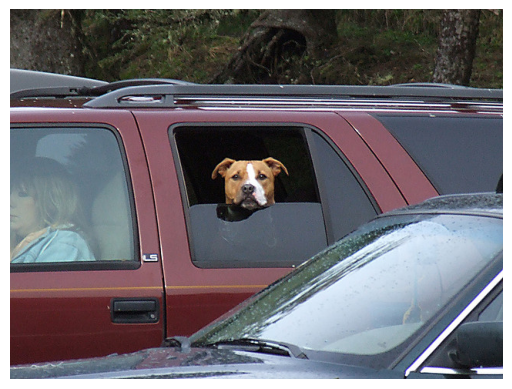

In [14]:
example_image = coco.loadImgs(image_IDs[0])[0]
print(example_image)

image = io.imread(f'{train_img_dir}/{example_image["file_name"]}')
plt.axis("off")
plt.imshow(image)

plt.show()

In [15]:
# Get COCO annotation IDs and content of annotations, i.e., bounding boxes and segmentation masks.

test_image_annotations_ID = coco.getAnnIds(
    imgIds=example_image["id"], catIds=category_IDs, iscrowd=None
)
print(test_image_annotations_ID)

test_image_annotations = coco.loadAnns(test_image_annotations_ID)
print(test_image_annotations)

[353]
[{'id': 353, 'image_id': 32, 'category_id': 25, 'bbox': [252.09, 190.35, 109.71000000000001, 137.54], 'segmentation': [[350.0, 326.5, 251.5, 325.0, 263.5, 289.0, 278.5, 259.0, 281.0, 256.5, 300.5, 258.0, 279.0, 254.5, 277.5, 221.0, 272.0, 215.5, 269.0, 221.5, 261.5, 220.0, 263.5, 207.0, 274.0, 194.5, 286.0, 192.5, 300.0, 195.5, 339.0, 189.5, 357.5, 205.0, 360.0, 214.5, 351.0, 207.5, 348.5, 213.0, 342.5, 216.0, 343.5, 250.0, 330.5, 257.0, 337.0, 255.5, 339.5, 259.0, 341.5, 285.0, 350.0, 326.5], [305.5, 259.0, 301.5, 259.0, 305.5, 259.0]], 'area': 15089.5134, 'iscrowd': 0, 'supercategory': 'animal'}]


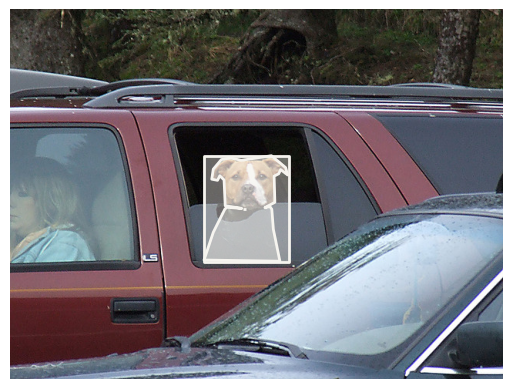

In [16]:
# Load and display test image with instance annotations.

plt.imshow(image)
plt.axis("off")

coco.showAnns(test_image_annotations, draw_bbox=True)

In [17]:
# Extract the training images that contain any combination of the four target classes.

target_classes = ["cake", "cat", "dog", "person"]
target_classes_IDs = coco.getCatIds(catNms=target_classes)
training_images = []

# Iterate over each individual class in the list.
for class_name in target_classes:
    # Get all images containing target class.
    print(class_name)
    training_images_categories = coco.getCatIds(catNms=class_name)
    training_images_IDs = coco.getImgIds(catIds=training_images_categories)
    training_images += coco.loadImgs(training_images_IDs)

print(
    f"Number of images with target classes including repetitions: {len(training_images)}."
)

cake
cat
dog
person
Number of images with target classes including repetitions: 287.


In [18]:
# Filter out repeated images.
unique_training_images = []

for i in range(len(training_images)):
    if training_images[i] not in unique_training_images:
        unique_training_images.append(training_images[i])

# Shuffle the training data.
random.seed(0)
random.shuffle(unique_training_images)

print(
    f"Number of unique images in training data containing the target classes: {len(unique_training_images)}"
)

Number of unique images in training data containing the target classes: 276


{'id': 244, 'file_name': '000000016403.jpg', 'height': 640, 'width': 480, 'license': None, 'coco_url': None}


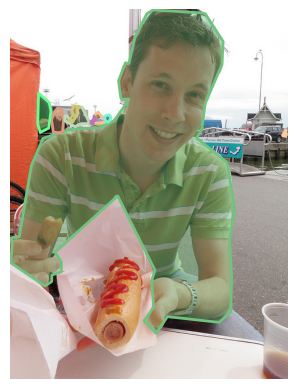

In [19]:
# Load and display example training image with segmentation masks.

training_image = unique_training_images[10]
print(training_image)

image = io.imread(f'{train_img_dir}/{training_image["file_name"]}')
plt.axis("off")
plt.imshow(image)

training_image_annotations_ID = coco.getAnnIds(
    imgIds=training_image["id"], catIds=target_classes_IDs, iscrowd=None
)
training_image_annotations = coco.loadAnns(training_image_annotations_ID)
coco.showAnns(training_image_annotations, draw_bbox=False)

plt.show()

In [20]:
# To generate segmentation mask use annToMask function and extract the info stored in the annotations.
# For example, for the first object in our example training image:

mask_example = coco.annToMask(training_image_annotations[0])

print(type(mask_example))
print(mask_example)
print(mask_example.shape)
print(np.max(mask_example))
print(np.min(mask_example))

<class 'numpy.ndarray'>
[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]
(640, 480)
1
0


Unique pixel values in the mask: [0. 3.]


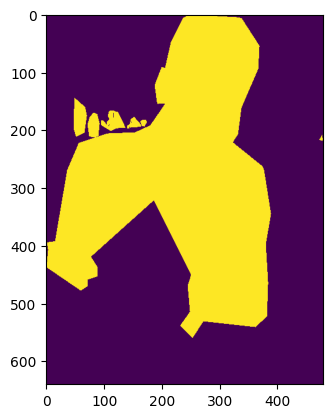

In [21]:
# Plotting the segmentation masks with different colours.
# There are many ways to do this. This is just one example.

mask = np.zeros((training_image["height"], training_image["width"]))

for i in range(len(training_image_annotations)):
    # Get object category name.
    object_category = get_catg_name(
        training_image_annotations[i]["category_id"], categories
    )
    # Assign pixel value based on location in target_classes list.
    pixel_value = target_classes.index(object_category) + 1
    # Assign pixel value to mask based on annToMask output.
    mask = np.maximum(coco.annToMask(training_image_annotations[i]) * 3, mask)

print(f"Unique pixel values in the mask: {np.unique(mask)}")

plt.imshow(mask)
plt.show()


**Model**

In [22]:
import torch
import torch.nn as nn
import torchvision
import torchvision.models as models
import torchvision.transforms as T
from PIL import Image
from torchvision.transforms import ToTensor


In [39]:
import os
import numpy as np
import torch
from torch.utils.data import Dataset, DataLoader
import cv2
import matplotlib.pyplot as plt
from pycocotools.coco import COCO
import segmentation_models_pytorch as smp
import albumentations as A
from albumentations.pytorch import ToTensorV2


# --- COCO Setup ---
coco = COCO(train_ann_path)
target_classes = ["cake", "cat", "dog", "person"]
cat_ids = coco.getCatIds(catNms=target_classes)
catid2index = {cat_id: i+1 for i, cat_id in enumerate(cat_ids)}  # 0 = background

# --- Get Image IDs ---
image_ids = []
for cat in target_classes:
    image_ids += coco.getImgIds(catIds=coco.getCatIds(catNms=[cat]))
image_ids = list(set(image_ids))  # unique

# --- Albumentations Transforms ---
transform = A.Compose([
    A.Resize(256, 256),
    A.Normalize(),
    ToTensorV2()
])

# --- Dataset Function ---
def load_data(image_id):
    img_info = coco.loadImgs(image_id)[0]
    img_path = os.path.join(train_img_dir, img_info['file_name'])
    image = cv2.imread(img_path)
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

    ann_ids = coco.getAnnIds(imgIds=image_id, catIds=cat_ids)
    anns = coco.loadAnns(ann_ids)

    mask = np.zeros((img_info["height"], img_info["width"]), dtype=np.uint8)
    for ann in anns:
        mask = np.maximum(mask, coco.annToMask(ann) * catid2index[ann['category_id']])

    augmented = transform(image=image, mask=mask)
    return augmented['image'], augmented['mask'].long()

# --- DataLoader ---
class SimpleDataset(Dataset):
    def __init__(self, ids): self.ids = ids
    def __len__(self): return len(self.ids)
    def __getitem__(self, idx): return load_data(self.ids[idx])

dataset = SimpleDataset(image_ids)
loader = DataLoader(dataset, batch_size=4, shuffle=True)

# --- U-Net with pretrained encoder (transfer learning) ---
model = smp.Unet(
    encoder_name='resnet34',
    encoder_weights='imagenet',
    in_channels=3,
    classes=5  # 4 classes + background
).cuda()

# --- Loss & Optimizer ---
loss_fn = torch.nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(), lr=1e-4)



loading annotations into memory...
Done (t=0.12s)
creating index...
index created!
Epoch 1, Loss: 93.7658
Epoch 2, Loss: 50.7120
Epoch 3, Loss: 32.5736
Epoch 4, Loss: 24.1155
Epoch 5, Loss: 19.4584
Epoch 6, Loss: 15.9870


In [43]:
# !pip install segmentation_models_pytorch
# --- Training Loop ---
for epoch in range(12):  # quick test
    model.train()
    total_loss = 0
    for img, mask in loader:
        img, mask = img.cuda(), mask.cuda()
        out = model(img)
        loss = loss_fn(out, mask)
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
        total_loss += loss.item()
    print(f"Epoch {epoch+1}, Loss: {total_loss:.4f}")

Epoch 1, Loss: 13.7830
Epoch 2, Loss: 11.5445
Epoch 3, Loss: 10.6732
Epoch 4, Loss: 10.0123
Epoch 5, Loss: 9.5297
Epoch 6, Loss: 8.8161
Epoch 7, Loss: 7.7689
Epoch 8, Loss: 7.6167
Epoch 9, Loss: 6.5467
Epoch 10, Loss: 6.3771
Epoch 11, Loss: 5.5644
Epoch 12, Loss: 5.7628


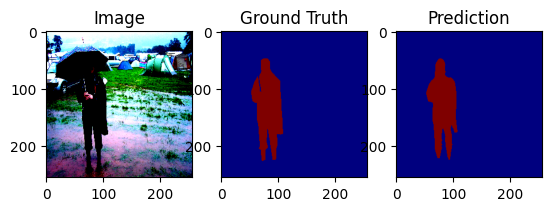

In [51]:
model.eval()
with torch.no_grad():
    img, mask = load_data(image_ids[6])
    pred = model(img.unsqueeze(0).cuda())
    pred_mask = torch.argmax(pred.squeeze(), dim=0).cpu().numpy()

plt.subplot(1, 3, 1)
plt.title("Image")
plt.imshow(img.permute(1, 2, 0))

plt.subplot(1, 3, 2)
plt.title("Ground Truth")
plt.imshow(mask, cmap='jet')

plt.subplot(1, 3, 3)
plt.title("Prediction")
plt.imshow(pred_mask, cmap='jet')
plt.show()


In [25]:
# # Basic conv block
# def conv_block(in_channels, out_channels):
#     return nn.Sequential(
#         nn.Conv2d(in_channels, out_channels, 3, padding=1),
#         nn.ReLU(),
#         nn.Conv2d(out_channels, out_channels, 3, padding=1),
#         nn.ReLU())

In [26]:
# # U-Net with functional style
# def build_unet():
#     model = nn.ModuleDict({
#         'enc1': conv_block(3, 64),
#         'enc2': conv_block(64, 128),
#         'enc3': conv_block(128, 256),
#         'middle': conv_block(256, 512),
#         'dec3': conv_block(512 + 256, 256),
#         'dec2': conv_block(256 + 128, 128),
#         'dec1': conv_block(128 + 64, 64),
#         'up3': nn.ConvTranspose2d(512, 256, 2, stride=2),
#         'up2': nn.ConvTranspose2d(256, 128, 2, stride=2),
#         'up1': nn.ConvTranspose2d(128, 64, 2, stride=2),
#         'final': nn.Conv2d(64, 5, 1)  # 4 classes + background
#         })
#     return model

In [27]:
# # Forward function
# def unet_forward(model, x):
#     pool = nn.MaxPool2d(2)

#     e1 = model['enc1'](x)
#     e2 = model['enc2'](pool(e1))
#     e3 = model['enc3'](pool(e2))

#     m = model['middle'](pool(e3))

#     d3 = model['dec3'](torch.cat([model['up3'](m), e3], dim=1))
#     d2 = model['dec2'](torch.cat([model['up2'](d3), e2], dim=1))
#     d1 = model['dec1'](torch.cat([model['up1'](d2), e1], dim=1))

#     return model['final'](d1)

In [28]:
# images = []
# masks = []

# for img_id in coco.getImgIds(catIds=target_classes_IDs):
#     img_info = coco.loadImgs(img_id)[0]
#     path = os.path.join(train_img_dir, img_info['file_name'])
#     image = Image.open(path).convert("RGB").resize((256, 256))
#     image = ToTensor()(image)
#     images.append(image)

#     anns = coco.loadAnns(coco.getAnnIds(imgIds=img_id, catIds=target_classes_IDs))
#     mask = np.zeros((256, 256), dtype=np.uint8)

#     for ann in anns:
#         m = coco.annToMask(ann)
#         m = Image.fromarray(m).resize((256, 256))
#         m = np.array(m)
#         class_idx = target_classes.index(get_catg_name(ann['category_id'])) + 1
#         mask = np.where(m > 0, class_idx, mask)

#     masks.append(torch.tensor(mask, dtype=torch.long))
# print(f"Number of images loaded: {len(images)}") # Check if images list is populated
# print(f"Number of masks loaded: {len(masks)}") # Check if masks list is populated


In [29]:
# model = build_unet().to("cuda")
# optimizer = torch.optim.Adam(model.parameters(), lr=1e-3)
# loss_fn = nn.CrossEntropyLoss()

# for epoch in range(3):
#     total_loss = 0
#     for i in range(len(images)):
#         img = images[i].unsqueeze(0).to("cuda")
#         mask = masks[i].unsqueeze(0).to("cuda")

#         out = unet_forward(model, img)  # (1, 5, H, W)
#         loss = loss_fn(out, mask)

#         optimizer.zero_grad()
#         loss.backward()
#         optimizer.step()

#         total_loss += loss.item()

#     print(f"Epoch {epoch+1} - Loss: {total_loss:.4f}")


In [30]:
# model.eval()
# with torch.no_grad():
#     img = images[0].unsqueeze(0).to("cuda")
#     pred = unet_forward(model, img)
#     pred_mask = pred.argmax(1).squeeze().cpu().numpy()

# plt.imshow(pred_mask)
# plt.axis("off")
# plt.title("Predicted Segmentation")
# plt.show()
